In [1]:
import numpy as np
import pickle
import time
import sys


In [2]:
import numpy as np

#It's kk to import whatever you want from the local util module if you would like:
#from util.X import ... 

def count_fingers_deep(im):
    '''
    Example submission for coding challenge. 
    
    Args: im (nxm) unsigned 8-bit grayscale image 
    Returns: One of three integers: 1, 2, 3
    
    '''    
    im = im>50
    T = np.zeros_like(im)
#     for col in range(0,im.shape[1],1):
#         for row in range(0,im.shape[0],1):
#             if (row+9>=im.shape[0] or col+9>=im.shape[1]):
#                 continue
#             cut = im[row:row+9,col:col+9]
#             if (cut[4,4] and not cut[0,0] and cut[5,8]):
#                 T[row+4,col+4]=1    
#     top_half = T[:20,:]
    a = im.sum(axis=0)
    a = np.diff(a)
    peaks = np.where((a[1:-1] > a[0:-2]) * (a[1:-1] > a[2:]))[0] + 1
    if peaks.shape[0] < 1:
        return 1
    elif peaks.shape[0]>3:
        return 3
    else:
        return peaks.shape[0]

In [3]:
def evaluate(student_file = 'deep_ghaghara', data_file = '../../learning_to_see/data/training_data.p'):
    '''
    Evaluate performance on finger-counting challenge.
    '''

    #import student method:
    # from sample_student import count_fingers
    #count_fingers = getattr(__import__(student_file, 'count_fingers'), 'count_fingers')


    with open(data_file, 'rb') as f:
        d = pickle.load(f)

    confusion_matrix = np.zeros((3,3), dtype = 'int')

    for i in range(len(d)):
        cropped_image = d[i]['image'][d[i]['boxEdges'][2]:d[i]['boxEdges'][3], \
                                     d[i]['boxEdges'][0]:d[i]['boxEdges'][1]] 
        label = count_fingers_deep(cropped_image)

        confusion_matrix[d[i]['numFingers']-1, label-1] += 1

    accuracy = np.sum(np.diag(confusion_matrix))/np.sum(confusion_matrix)


    #print out performance numbers:

    print('                  Correct Labels  ')
    print('                  1      2      3')
    print('                 -----------------')
    print('Predicted     1 | ' + str(confusion_matrix[0, 0]) + '      ' + 
                         str(confusion_matrix[0, 1]) + '      ' + 
                         str(confusion_matrix[0, 2]) + '      ')

    print('Labels        2 | ' + str(confusion_matrix[1, 0]) + '      ' + 
                         str(confusion_matrix[1, 1]) + '      ' + 
                         str(confusion_matrix[1, 2]) + '      ')

    print('              3 | ' + str(confusion_matrix[2, 0]) + '      ' + 
                         str(confusion_matrix[2, 1]) + '      ' + 
                         str(confusion_matrix[2, 2]) + '      ')

    print('\n')
    print('Accuracy = ' + str(round(accuracy, 3)))

    return accuracy, confusion_matrix


def calculate_score(accuracy):
    score = 0
    if accuracy >= 0.8:
        score = 10
    elif accuracy >= 0.7:
        score = 9
    elif accuracy >= 0.6:
        score = 8
    elif accuracy >= 0.5:
        score = 7
    elif accuracy >= 0.4:
        score = 6
    elif accuracy >= 0.35:
        score = 5
    elif accuracy >= 0:
        score = 4
    return score

In [4]:
###MAIN FILE TO TEST
program_start = time.time()
accuracy, _ = evaluate()
print(accuracy)
score = calculate_score(accuracy)
program_end = time.time()
total_time = round(program_end - program_start,2)

print("Execution time (seconds) = ", total_time)
print("Score = ", score)
print()

                  Correct Labels  
                  1      2      3
                 -----------------
Predicted     1 | 0      0      16      
Labels        2 | 0      0      18      
              3 | 0      0      8      


Accuracy = 0.19
0.19047619047619047
Execution time (seconds) =  0.01
Score =  4



In [5]:
data_file = '../../learning_to_see/data/training_data.p'
with open(data_file, 'rb') as f:
    d = pickle.load(f)
confusion_matrix = np.zeros((3,3), dtype = 'int')

In [6]:
i = 20
cropped_image = d[i]['image'][d[i]['boxEdges'][2]:d[i]['boxEdges'][3], \
                                 d[i]['boxEdges'][0]:d[i]['boxEdges'][1]] 
#label = count_fingers_deep(cropped_image)
import matplotlib.pyplot as plt
print(cropped_image.shape)
cropped_image = cropped_image>92
a = cropped_image.sum(axis=0)
a = a/a.sum()
# w=eval('numpy.hanning(11)')
# s=numpy.r_[a[11-1:0:-1],a,a[-2:-11-1:-1]]
# a=numpy.convolve(w/w.sum(),s,mode='valid')
plt.plot(a)
# plt.hist(cropped_image>, bins=20)
# plt.ylabel('No of times')
# plt.show()
############

(57, 37)


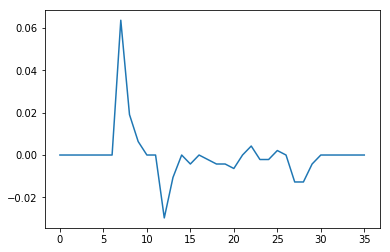

In [7]:
##Test diff
dx = 1
dy = np.diff(a)/dx
plt.plot(dy)

In [8]:
%pylab inline 
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


c:\users\dghag\anaconda3\envs\unccv\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


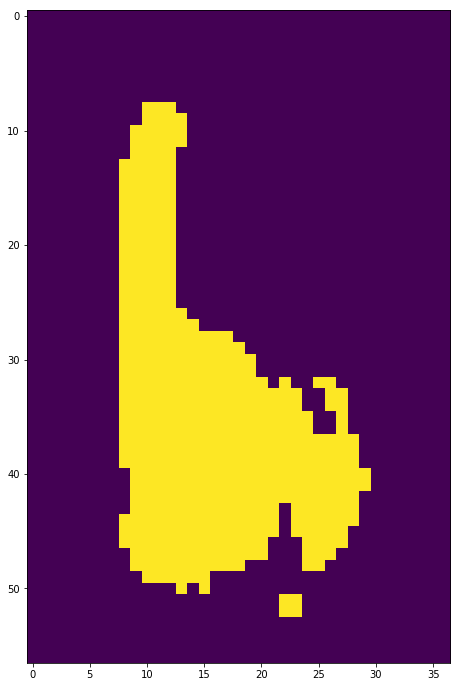

In [9]:
fig = figure(0, (12,12))
imshow(cropped_image)

(64, 38)


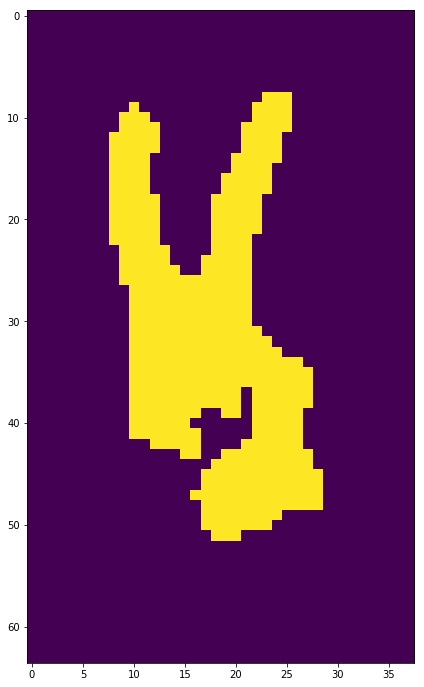

In [111]:
i =1
cropped_image = d[i]['image'][d[i]['boxEdges'][2]:d[i]['boxEdges'][3], \
                                 d[i]['boxEdges'][0]:d[i]['boxEdges'][1]] 
#label = count_fingers_deep(cropped_image)
import matplotlib.pyplot as plt
print(cropped_image.shape)
cropped_image = cropped_image>125
# T = np.zeros_like(cropped_image)
# for col in range(0,cropped_image.shape[1],1):
#     for row in range(0,cropped_image.shape[0],1):
#         if (row+9>=cropped_image.shape[0] or col+9>=cropped_image.shape[1]):
#             continue
#         cut = cropped_image[row:row+9,col:col+9]
#         if (cut[4,4] and not cut[0,0] and cut[5,8]):
#             T[row+4,col+4]=1
        #print(row,col,cut.shape)

fig = figure(0, (12,12))
imshow(cropped_image)       


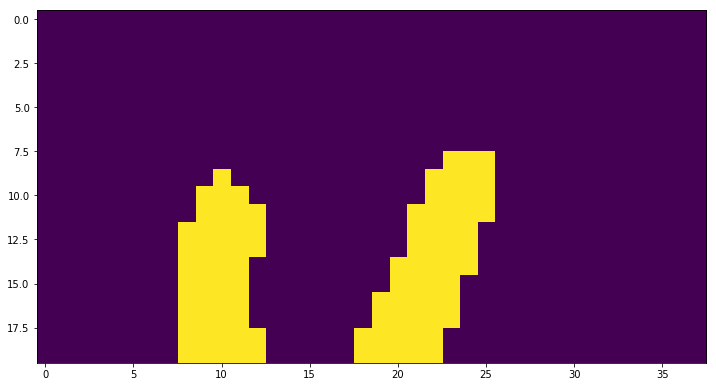

In [112]:
top_half = cropped_image[:20,:]
fig = figure(0, (12,12))
imshow(top_half) 

[ 0  0  0  0  0  0  0  0  8 10 11 10  5  0  0  0  0  0  2  4  6  9 11 10
  7  4  0  0  0  0  0  0  0  0  0  0  0  0]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0]
2


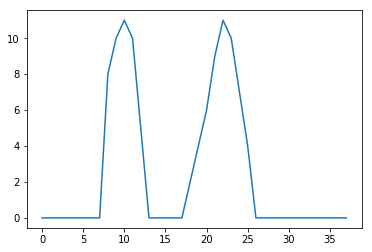

In [113]:
top_half = cropped_image[:20,:]
a = top_half.sum(axis=0)
plt.plot(a)
# 
b = np.zeros_like(a)
print(a)
for i in range(0,a.shape[0]-2):
    if i>0 and i<a.shape[0]-2:
        if (a[i-1] or a[i+1]) != 0:
            b[i]=1
print(b)
ctr = 0
for i in range(0,b.shape[0]-1):
    if b[i]==1 and b[i+1]!=1:
        ctr+=1
print(ctr)
        